
William Fallas

# Conjunto de datos de series de tiempo

PickupRequest es una serie de tiempo con la cantidad de cargas hechas por día y transportista, los datos son del 2016 hasta la fecha presente.

In [0]:
import pandas

from google.colab import drive
from pandas import read_csv
from pandas import Series
import numpy as np


# This will prompt for authorization.
drive.mount('/content/drive/')
# !ls "/content/drive/My Drive/Parma/LibroVersionMasReciente/2_Preprocesamiento/dataImputing/"

miDatasetPath = '/content/PickupRequest.csv'
series = pandas.read_csv(miDatasetPath, header=0, parse_dates=[1], index_col=1, squeeze=True)



SerieTotales.head()

print(series.head())
print(type(SerieTotales))
print(series.size)
print(SerieTotales.describe())




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
            quantity Carrier
date                        
2016-01-01         1    GTWY
2016-01-01         1    SAIA
2016-01-01         1    UPSS
2016-01-02         1    1834
2016-01-04         1    1839
<class 'pandas.core.frame.DataFrame'>
153480
           quantity
count  73601.000000
mean      12.559653
std       21.557343
min        1.000000
25%        1.000000
50%        3.000000
75%       13.000000
max      425.000000


# Exploración de Atributos 

Se  agrupan las cargas por día, además se elimina la columna código del transportista, esto para llevar a cabo análisis del comportamiento de la demanda de cargas de manera global.

In [0]:


#eliminar el carrier de la serie totales para hacer analisis global de demanda
SerieTotales=series.drop(columns=['Carrier'])


#eliminar los datos del 2020, al estar algunos meses incompletos genera ruido en el analisis
SerieTotales=SerieTotales[(SerieTotales.index.year<2020)]



El promedio de cargas por día es de 641, pero con una desviación 
estándar muy alta.


In [0]:

df = SerieTotales.groupby(SerieTotales.index).agg({'quantity':sum})

print(df.head())
print(df.size)
print(df.describe())



            quantity
date                
2016-01-01         3
2016-01-02         1
2016-01-04       576
2016-01-05       609
2016-01-06       608
1441
          quantity
count  1441.000000
mean    641.501041
std     438.891024
min       1.000000
25%      22.000000
50%     803.000000
75%     982.000000
max    1514.000000


Ver histórico completo de cargas por día, en este gráfico se observan picos de demanda a mediados del año 2017, este podría deberse a la entrada de un nuevo cliente al sistema. 

Text(0, 0.5, 'Cargas por dia')

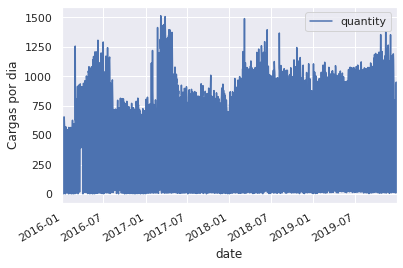

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

df.plot()
plt.ylabel("Cargas por dia")


Gráfico  en versión seaborn, agrupando los datos por día, la demanda de transporte baja a finales de noviembre(semana de Thanksgiving) y el mes de diciembre

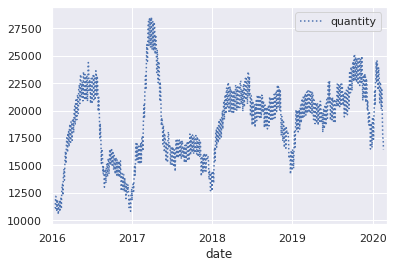

In [0]:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()


daily = series.resample('D').sum()

daily.rolling(30,center=True).sum().plot(style=[':','--','-'])




Histograma de la demanda de cargas, se nota una distribución gaussiana excepto por la barra cercana a las 0 cargas, esto probablemente se daba a los fines de semana.


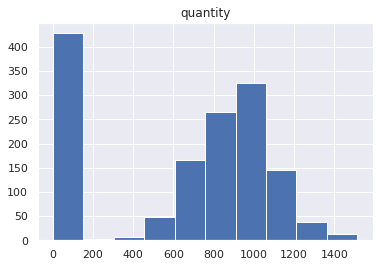

In [0]:
df.hist()
plt.show()

Análisis de demanda de carga según los días de la semana, se comprueba que sábados y domingos la demanda es mínima

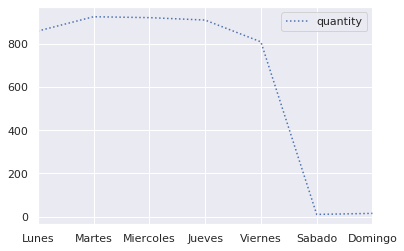

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

by_weekDay = df.groupby(df.index.dayofweek).mean()
by_weekDay.index=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
by_weekDay.plot(style=[':','--','-'])

Técnica downsampling data  para graficar las demandas agrupadas por  mes

Text(0, 0.5, 'Cargas por mes')

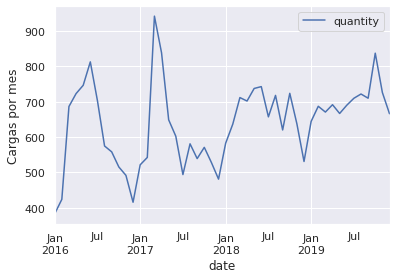

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

resample = df.resample("M")
DsCargasPorMes = resample.mean()



DsCargasPorMes.plot()
plt.ylabel("Cargas por mes")






---


Gráfico de demandas históricas agrupadas por mes, los datos 

muestran una baja demanda desde finales de noviembre a enero, este por la epoca de invierno en Estados Unidos, apartir de marzo aumenta la demanda ya que inicia la recoleta de productos agricolas en texas, florida, georgia , etc


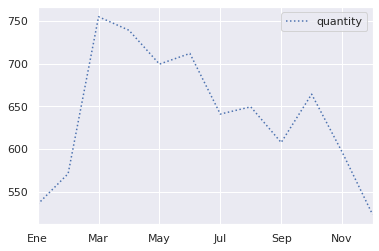

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

by_Month = df.groupby(df.index.month).mean()
by_Month.index=["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
by_Month.plot(style=[':','--','-'])

Histograma agrupado por mes, la distribución es relativamente  normal

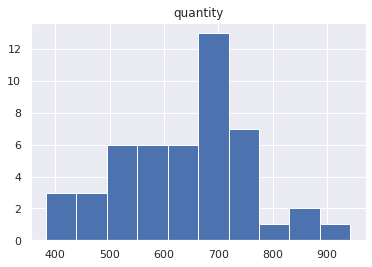

In [0]:
#histograma de demanda por mes
#los valores cercanos a 0 son los fines de semana
DsCargasPorMes.hist()
plt.show()


Agregar algunas columnas utilitarias, ejemplo si el día de la muestra fue fin de semana


In [0]:
#agregar algunas columnas utilitarias
DsCargasPorMes['year'] = [DsCargasPorMes.index[i].year for i in range(len(DsCargasPorMes))]
DsCargasPorMes['month'] = [DsCargasPorMes.index[i].month for i in range(len(DsCargasPorMes))]
DsCargasPorMes['day'] = [DsCargasPorMes.index[i].day for i in range(len(DsCargasPorMes))]
DsCargasPorMes['dayofweek'] = [DsCargasPorMes.index[i].dayofweek for i in range(len(DsCargasPorMes))] 
DsCargasPorMes['weekend'] =DsCargasPorMes['dayofweek'] >= 5
DsCargasPorMes.head()



,quantity,year,month,day,dayofweek,weekend
date,,,,,,
2016-01-31,382.758621,2016,1,31,6,True
2016-02-29,423.655172,2016,2,29,0,False
2016-03-31,686.592593,2016,3,31,3,False
2016-04-30,723.074074,2016,4,30,5,True
2016-05-31,746.566667,2016,5,31,1,False


**Análisis de la demanda de los principales transportistas**

Las cargas servidas por EXLA se cae del 2019 hasta hoy, mientras que la demanda de Conway se dispara en el último año

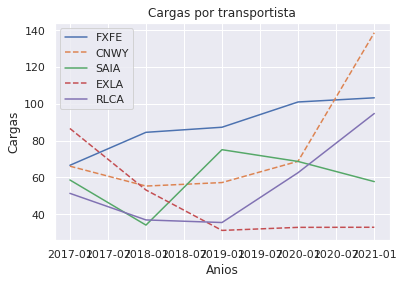

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()



filter =  (series['Carrier']=="FXFE" )
carrier=series[filter]

resample = carrier.resample("Y")
DsCargasFXFE = resample.mean()


filter =  (series['Carrier']=="CNWY" )
carrier=series[filter]
resample = carrier.resample("Y")
DsCargasCNWY = resample.mean()

filter =  (series['Carrier']=="SAIA" )
carrier=series[filter]
resample = carrier.resample("Y")
DsCargasSAIA = resample.mean()


filter =  (series['Carrier']=="EXLA" )
carrier=series[filter]
resample = carrier.resample("Y")
DsCargasEXLA = resample.mean()



filter =  (series['Carrier']=="RLCA" )
carrier=series[filter]
resample = carrier.resample("Y")
DsCargasRLCA = resample.mean()

fig  = plt.figure()

x= np.linspace(0,10,100)

plt.title("Cargas por transportista")
plt.plot(DsCargasFXFE,'-',label="FXFE")
plt.plot(DsCargasCNWY,'--',label="CNWY")
plt.plot(DsCargasSAIA,'-',label="SAIA")
plt.plot(DsCargasEXLA,'--',label="EXLA")
plt.plot(DsCargasRLCA,'-',label="RLCA")
plt.ylabel("Cargas")
plt.xlabel("Anios")

plt.legend();



En el gráfico boxplot  se notan posibles outliers en el año 2017

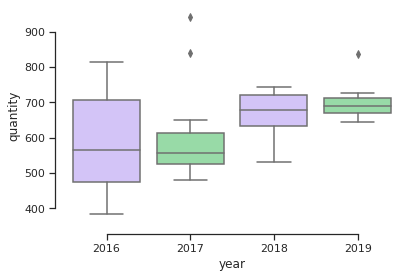

In [0]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="year", y="quantity",
             palette=["m", "g"],
            data=DsCargasPorMes)
sns.despine(offset=10, trim=True)

En la distribución por mes, se nota una media de mayor demanda entre marzo y junio.

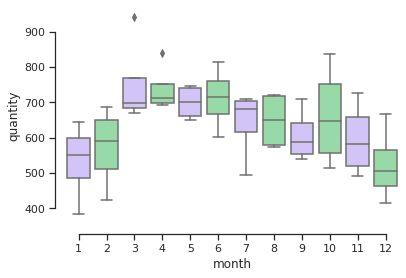

In [0]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="month", y="quantity",
             palette=["m", "g"],
            data=DsCargasPorMes)
sns.despine(offset=10, trim=True)

# Aplicación de técnicas sobre las series de tiempo


La serie de datos está dada por día, se aplicara la técnica de Downsampling para ver los datos por mes

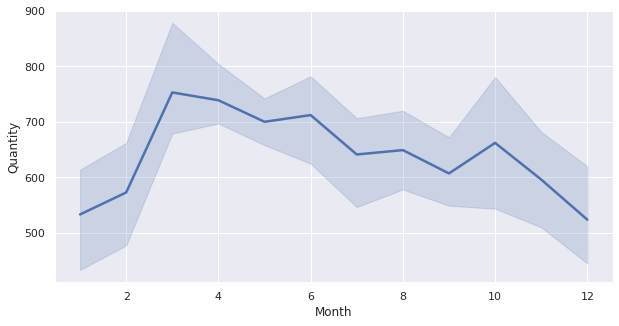

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

resample = df.resample("M")
DsCargasPorMes = resample.mean()


plt.figure(figsize=(10,5))

line = sns.lineplot(data=DsCargasPorMes,x=DsCargasPorMes.index.month, 
             y="quantity", linewidth=2.5)


line.set(xlabel='Month', ylabel='Quantity')

# Show plot
plt.show()

Experimentación con una transformación boxcox, si se comparan los datos originales con los transformados en el histograma, se comprueba que el cambio fue mínimo.

Lamda: %f 1.0719252066991984


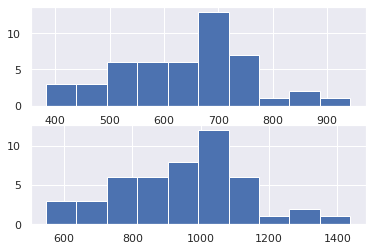

In [0]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# generate non-normal data
transform_data = pandas.DataFrame(DsCargasPorMes["quantity"].values)
transform_data.columns = ["quantity"]

# transform training data & save lambda value
transform_data["quantity_transf"],lam = stats.boxcox(transform_data["quantity"])

print('Lamda: %f',lam)

plt.figure(1)
plt.subplot(211)
plt.hist(transform_data["quantity"])

plt.subplot(212)
plt.hist(transform_data["quantity_transf"])
plt.show();



In [0]:

print(transform_data["quantity"].describe())
print(transform_data["quantity_transf"].describe())

count     48.000000
mean     640.590386
std      115.829782
min      382.758621
25%      554.223214
50%      661.728495
75%      713.403226
max      942.387097
Name: quantity, dtype: float64
count      48.000000
mean      951.478690
std       184.120060
min       546.761007
25%       813.514213
50%       983.971518
75%      1066.639975
max      1437.822301
Name: quantity_transf, dtype: float64



Luego de aplicar boxcox, el valor de lambda es de 1.07, lo que significa una transformación de Y elevado a la 1.07, Boxcox no logró un cambio significativo en el conjunto de datos, ya de por sí, tenían una distribución normal.



**Predicción con Average Smoothing**

Predicción con los datos agrupados por mes, utilizando técnicas de smooth average

Test RMSE 116.951


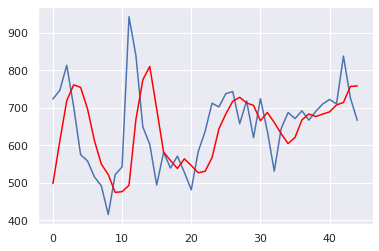

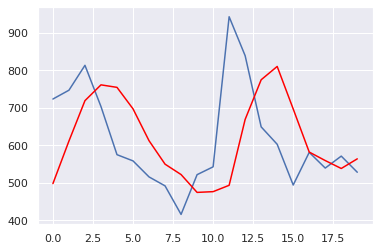

In [0]:
from math import sqrt
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

X=  DsCargasPorMes["quantity"]
window = 3

history = [X[i] for i in range(window)]

test = [X[i] for i in range(window,len(X))]

predictions = list()

for t in range(len(test)):
  length = len(history)
  yhat = mean([history[i] for i in range(length-window,length)])
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)

rmse = sqrt(mean_squared_error(test,predictions))

print ("Test RMSE %.3f" % rmse )

pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()

pyplot.plot(test[:20])
pyplot.plot(predictions[:20],color='red')
pyplot.show()


Las predicciones estan rojo, el real en azul.

La métrica de predicción RMSE nos da: 116.9, lo cual significa que los valores de predicción podrían estar 117 cargas lejos del valor real, por la tanto, el modelo predictor no es tan preciso.

**Random Walk y estacionario.**

Observando los plots se nota un comportamiento estacionario(picos de demanda) entre los meses de marzo y mayo.

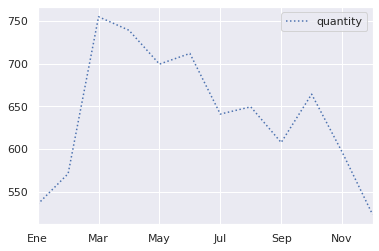

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

by_Month = df.groupby(df.index.month).mean()
by_Month.index=["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
by_Month.plot(style=[':','--','-'])

Text(0, 0.5, 'Cargas por mes')

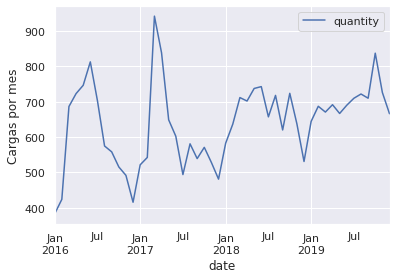

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

resample = df.resample("M")
DsCargasPorMes = resample.mean()



DsCargasPorMes.plot()
plt.ylabel("Cargas por mes")


**Estadísticas de resumen**


Las estadísticas de resumen calculadas en las series temporales son consistentes en el tiempo, como la media o la varianza de las observaciones, en este caso las medidas son muy distintas, al parecer la serie es no estacionaria.

In [0]:
X = DsCargasPorMes["quantity"]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=596.829312, mean2=684.351459
variance1=19781.522148, variance2=3638.294670


**Dickey-Fuller test**

La prueba de Dickey-Fuller aumentada es un tipo de prueba estadística llamada prueba de raíz unitaria.

La intuición detrás de una prueba de raíz unitaria es que determina qué tan fuertemente una serie temporal está definida por una tendencia.

La hipótesis nula de la prueba es que la serie de tiempo puede ser representada por una raíz unitaria, que no es estacionaria (tiene alguna estructura dependiente del tiempo). La hipótesis alternativa (rechazando la hipótesis nula) es que la serie temporal es estacionaria.


**Hipótesis nula (H0)**: si no se puede rechazar, sugiere que la serie temporal tiene una raíz unitaria, lo que significa que no es estacionaria. Tiene alguna estructura dependiente del tiempo.

**Hipótesis alternativa (H1)**: se rechaza la hipótesis nula; sugiere que la serie temporal no tiene una raíz unitaria, lo que significa que es estacionaria. No tiene una estructura dependiente del tiempo.

Se Interpreta este resultado utilizando el valor p de la prueba. Un valor p por debajo de un umbral (como 5% o 1%) sugiere que rechacemos la hipótesis nula (estacionaria), de lo contrario, un valor p por encima del umbral sugiere que no podemos rechazar la hipótesis nula (no estacionaria).

Valor p > 0.05: No se puede rechazar la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.

Valor p <= 0.05: Rechaza la hipótesis nula (H0), los datos no tienen una raíz unitaria y son estacionarios.


Fuente:

https://machinelearningmastery.com/time-series-data-stationary-python/


In [0]:
from statsmodels.tsa.stattools import adfuller

X = DsCargasPorMes["quantity"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.844750
p-value: 0.002481
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601



Al ejecutar el ejemplo imprime el valor estadístico de prueba de -3.84. Cuanto más negativa sea esta estadística, más probable es que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).

Como parte de la salida, obtenemos una tabla de búsqueda para ayudar a determinar la estadística ADF. Podemos ver que el valor estadístico de -3.84 es menor que el valor de -3,5 al 1%.

Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significación de menos del 1% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística).

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, que la serie temporal es estacionaria o no tiene una estructura dependiente del tiempo.

El valor  p-value: 0.002481 es menor que 0.05, por lo tanto los datos son estacionarios.
